In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func , inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Find the most recent date in the data set.
recent_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()    
recent_date

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
import datetime as dt
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)    


Query Date:  2016-08-23


In [34]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

results= session.query(Measurement.date,Measurement.prcp ).\
    filter(Measurement.date <= '2017-08-23' ).filter(Measurement.date >= query_date).order_by(Measurement.date.desc()).all()
rows = [{"Date": result[0], "Prcp": result[1]} for result in results]
rows

[{'Date': '2017-08-23', 'Prcp': 0.0},
 {'Date': '2017-08-23', 'Prcp': 0.0},
 {'Date': '2017-08-23', 'Prcp': 0.08},
 {'Date': '2017-08-23', 'Prcp': 0.45},
 {'Date': '2017-08-22', 'Prcp': 0.0},
 {'Date': '2017-08-22', 'Prcp': 0.0},
 {'Date': '2017-08-22', 'Prcp': 0.5},
 {'Date': '2017-08-21', 'Prcp': 0.0},
 {'Date': '2017-08-21', 'Prcp': 0.02},
 {'Date': '2017-08-21', 'Prcp': None},
 {'Date': '2017-08-21', 'Prcp': 0.56},
 {'Date': '2017-08-20', 'Prcp': 0.0},
 {'Date': '2017-08-20', 'Prcp': 0.01},
 {'Date': '2017-08-20', 'Prcp': None},
 {'Date': '2017-08-19', 'Prcp': 0.0},
 {'Date': '2017-08-19', 'Prcp': 0.0},
 {'Date': '2017-08-19', 'Prcp': None},
 {'Date': '2017-08-19', 'Prcp': 0.09},
 {'Date': '2017-08-18', 'Prcp': 0.0},
 {'Date': '2017-08-18', 'Prcp': 0.0},
 {'Date': '2017-08-18', 'Prcp': 0.06},
 {'Date': '2017-08-18', 'Prcp': None},
 {'Date': '2017-08-17', 'Prcp': 0.0},
 {'Date': '2017-08-17', 'Prcp': 0.05},
 {'Date': '2017-08-17', 'Prcp': 0.01},
 {'Date': '2017-08-17', 'Prcp': 0.13}

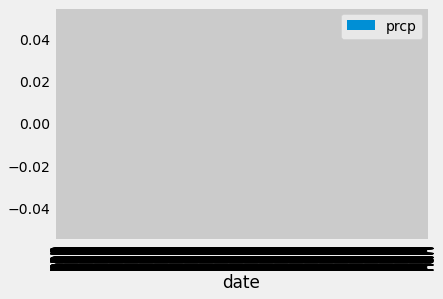

In [70]:
# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(rows, columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.plot.bar()
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [37]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [38]:
# Design a query to calculate the total number stations in the dataset
number_of_stations= session.query(Station.station).count()
print(number_of_stations)

9


In [55]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active= session.query(Measurement.station).group_by(Measurement.station).\
             order_by(func.count(Measurement.id).desc()).first()
most_active

('USC00519281',)

In [69]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(Measurement.tobs).group_by(Measurement.station == 'USC00519281').\
             order_by(func.min(Measurement.tobs)).first()
print(f"Lowest tempertature = {lowest_temp}")
highest_temp = session.query(Measurement.tobs).group_by(Measurement.station == 'USC00519281').\
             order_by(func.max(Measurement.tobs)).first()
print(f"Highest tempertature = {highest_temp}")
avg_temp = session.query(Measurement.tobs).group_by(Measurement.station == 'USC00519281').\
             order_by(func.avg(Measurement.tobs)).first()
print(f"Average tempertature = {avg_temp}")

Lowest tempertature = (53.0,)
Highest tempertature = (85.0,)
Average tempertature = (70.0,)


# Close session

In [85]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results= session.query(Measurement.date,Measurement.tobs ).\
         filter(Measurement.date <= '2017-08-23' ).filter(Measurement.date >= query_date).\
         filter(Measurement.station == 'USC00519281').all()
rows = [{"Date": result[0], "Temperature": result[1]} for result in results]
rows    


[{'Date': '2016-08-23', 'Temperature': 77.0},
 {'Date': '2016-08-24', 'Temperature': 77.0},
 {'Date': '2016-08-25', 'Temperature': 80.0},
 {'Date': '2016-08-26', 'Temperature': 80.0},
 {'Date': '2016-08-27', 'Temperature': 75.0},
 {'Date': '2016-08-28', 'Temperature': 73.0},
 {'Date': '2016-08-29', 'Temperature': 78.0},
 {'Date': '2016-08-30', 'Temperature': 77.0},
 {'Date': '2016-08-31', 'Temperature': 78.0},
 {'Date': '2016-09-01', 'Temperature': 80.0},
 {'Date': '2016-09-02', 'Temperature': 80.0},
 {'Date': '2016-09-03', 'Temperature': 78.0},
 {'Date': '2016-09-04', 'Temperature': 78.0},
 {'Date': '2016-09-05', 'Temperature': 78.0},
 {'Date': '2016-09-06', 'Temperature': 73.0},
 {'Date': '2016-09-07', 'Temperature': 74.0},
 {'Date': '2016-09-08', 'Temperature': 80.0},
 {'Date': '2016-09-09', 'Temperature': 79.0},
 {'Date': '2016-09-10', 'Temperature': 77.0},
 {'Date': '2016-09-11', 'Temperature': 80.0},
 {'Date': '2016-09-12', 'Temperature': 76.0},
 {'Date': '2016-09-13', 'Temperatu

In [ ]:
# Close Session
session.close()